# 03: Gaussian distribution

## 1. Implement the temperature measurement from lecture.

(Problem curtesy of Jakob Knollmüller)

Let's code up the problem that we discussed in lecture today!

**Prior:** 

$$P(x) = \mathcal{N}(x | x_0 , T), x_0 = 295, T=3^2$$

**Measurement noise**

$$P(n) =  \mathcal{N}(x | 0,1)$$

1a) Draw a true temp from the prior distribution, 

$$x_\mathrm{true} \sim \mathcal{P}(x),$$

a noise realization

$$n \sim  \mathcal{P}(n),$$

and generate data by adding the true temperature and the measurement noise:

$$y = x_\mathrm{true} + n.$$

In [4]:
from scipy.stats import Normal
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [38]:
# Parameters of the true distribution, x_true
x0 = 295

N = 1 # variance on the measurement noise
T = 9 # variance on the prior

num_points = 100 # number of points we'll sample

x = x0 + np.sqrt(T) * np.random.randn(num_points)
n = np.random.randn(num_points)

y = x + n # y will have a larger variance than x or n

Text(0, 0.5, 'Measured temperature (K)')

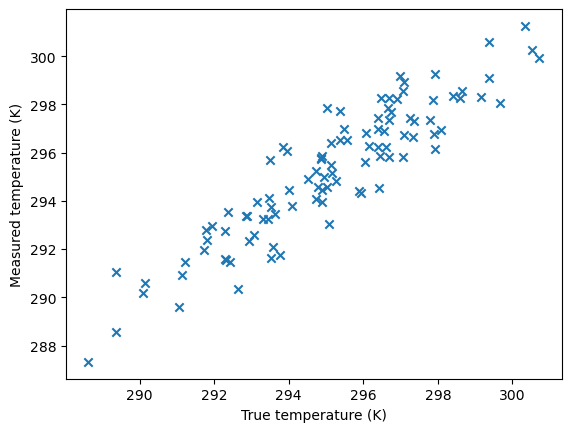

In [39]:
plt.scatter(x,y,marker='x')

plt.xlabel('True temperature (K)')
plt.ylabel("Measured temperature (K)")

Note, for the theory we worked out in lecture, we considered just one $(x,y)$ pair, but in the plot above we show a range of values to indicate the 

1b) Plot the prior distribution and indicate the data and ground truth as vertical lines

In [40]:
prior = Normal(mu=x0, sigma=np.sqrt(N))

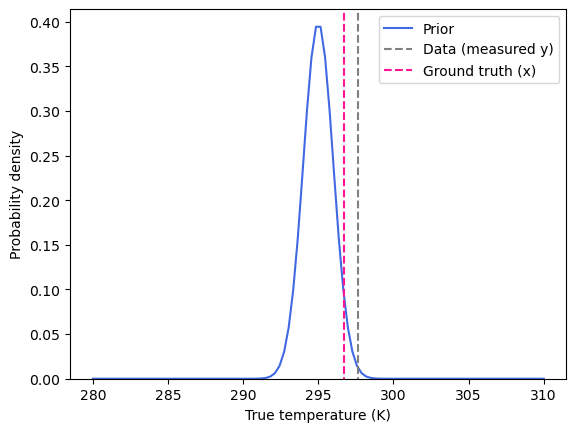

In [44]:
"""
Choose one (x,y) pair to get the posterior with
"""
i=0
xi = x[i]
yi = y[i]

xx = np.linspace(280,310,100)
plt.plot(xx,prior.pdf(xx),label='Prior',color='royalblue')

plt.xlabel('True temperature (K)')
plt.ylabel('Probability density')

ylim = plt.ylim()
plt.vlines(yi,*ylim,color='gray',linestyle='--',label='Data (measured y)')
plt.vlines(xi, *ylim, color="deeppink", linestyle="--", label="Ground truth (x)")
plt.ylim(0, ylim[1])

plt.legend()


In [32]:
xi

np.float64(292.5990710664038)

1c) Calculate the posterior mean and variance and include the posterior distribution on the plot

We solved for this in lecture:
$$\mu_\mathrm{post} = \frac{\frac{1}{N} y + \frac{1}{T} x_0}{\frac{1}{N} + \frac{1}{T}} $$
$${\sigma^{2}}_\mathrm{post} = \frac{1}{\frac{1}{N} + \frac{1}{T}},$$

where $N$ = variance on the measurement and $T$ is the variance on the prior.



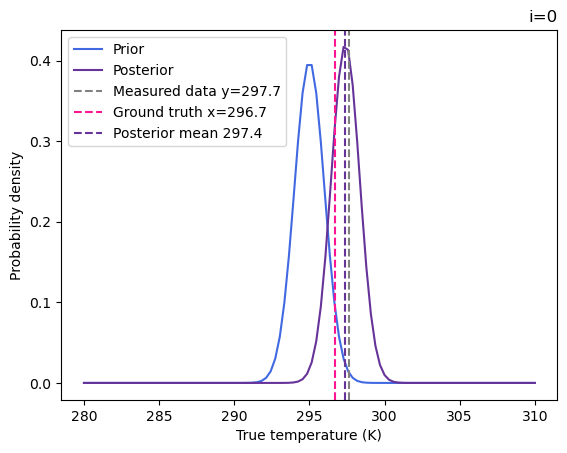

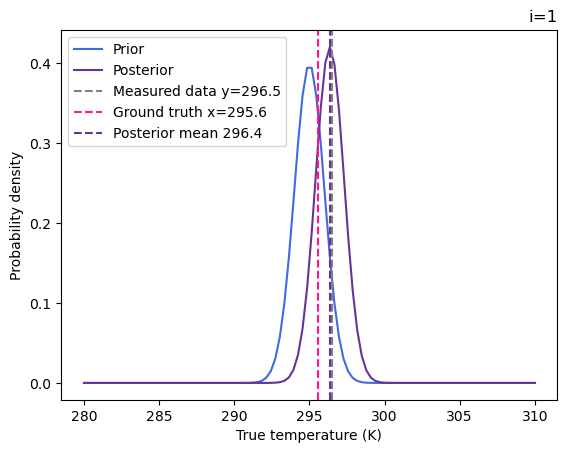

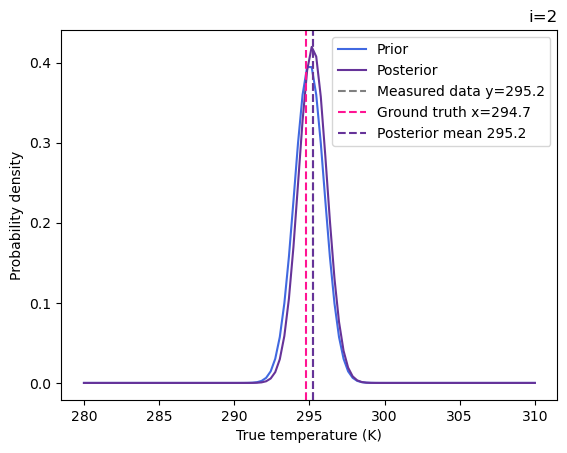

In [45]:
for i in range(3):
    xi = x[i]
    yi = y[i]

    var_p = 1 / (1 / N + 1 / T)
    mu_p = var_p * (yi / N + x0 / T)

    posterior = Normal(mu=mu_p, sigma=np.sqrt(var_p))

    plt.plot(xx, prior.pdf(xx), label='Prior',color='royalblue')
    plt.plot(xx, posterior.pdf(xx), label="Posterior", color="rebeccapurple")

    plt.xlabel('True temperature (K)')
    plt.ylabel('Probability density')

    ylim = plt.ylim()
    plt.vlines(
        yi, *ylim, color="grey", linestyle="--", label=f"Measured data y={yi:1.1f}"
    )
    plt.vlines(xi, *ylim, color="deeppink", linestyle="--", label=f"Ground truth x={xi:1.1f}")
    plt.vlines(mu_p, *ylim, color="rebeccapurple", linestyle="--", label=f"Posterior mean {mu_p:.1f}")
    plt.ylim(ylim)

    plt.legend()
    plt.title(f'i={i}',loc='right')
    plt.show()
    # break

**What have we learned?**

Purple is normally between grey and pink, but closer to pink (the meas data) b/c the noise level on the measurement process is much smaller than the noise level on the prior.

d) Repeat for various noise levels (but constant true temp) and discuss your findings

Constant true temperature means I keep $x_i$ fixed, but then consider differnt noise levels added on top (so play with increasing and decreasing $N$)

What do I expect the answer to be? ($N$ = variance on the noise)

- As $N$ decreases, $y$ carries more info of the true measurement process, so I'll expect the posterior to get closer to y
- For $N$ increasing by a lot, then I think the measurement will have no hope and the posterior will be identical to the prior

Try $\sigma^2 = 0.1, 1, 10, 100$

Note, on this plot the _true_ value for $x$ will remain the smae (e.g, the dashed pink line), but the measured value $y$ will change, so probably the most convenient visualization will be to have 5 subpanels side-by-side



<>:27: SyntaxWarning: invalid escape sequence '\s'
<>:27: SyntaxWarning: invalid escape sequence '\s'
/var/folders/5j/ynfw2g6n2cgdwgp6xdh3byn00000gp/T/ipykernel_2420/1592347296.py:27: SyntaxWarning: invalid escape sequence '\s'
  label=f"p(x|y, $\sigma^2$={N_[ii]})", #: y={yi:1.1f}",


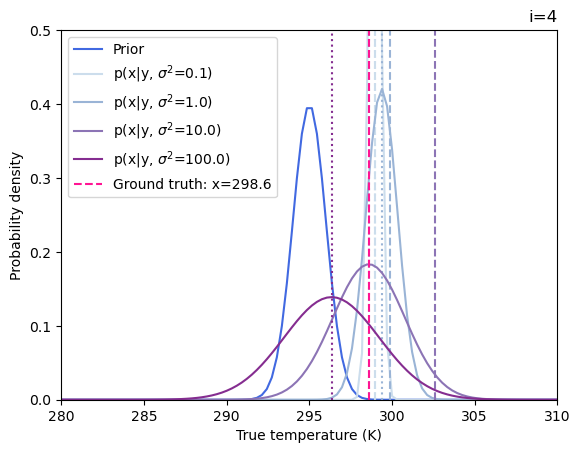

In [48]:
# for i in range(10):
i=4

xi = x[i]

# Now sample N and y as vectors
N_ = np.array([0.1, 1, 10, 100])

# y_ = xi + np.sqrt(N_) * np.random.randn(len(N_)) # <- alternatively, new sample for each noise level
y_ = xi + np.sqrt(N_) * np.random.randn() # <- one sample for each noise level

var_p_ = 1 / (1 / N_ + 1 / T)
mu_p_ = var_p_ * (y_ / N_ + x0 / T)

posterior_ = Normal(mu=mu_p_, sigma=np.sqrt(var_p_))

plt.plot(xx, prior.pdf(xx), label="Prior", color="royalblue")

ylim = (0,0.5)

for ii in range(len(N_)):
    yi = y_[ii]
    color = plt.get_cmap("BuPu")((ii+1) / (len(N_)+1))
    plt.plot(
        xx,
        posterior_.pdf(xx[:, None])[:, ii],
        label=f"p(x|y, $\sigma^2$={N_[ii]})", #: y={yi:1.1f}",
        color=color,
    )

    
    plt.vlines(
        yi, *ylim, color=color, linestyle="--"
        # , label=f"Data: measured y={yi:1.1f}"
    )

    plt.vlines(
        mu_p_[ii],
        *ylim,
        color=color,
        linestyle=":",
        # label=f"Posterior mean {mu_p_[ii]:.1f}",
    )

plt.ylim(ylim)

plt.xlabel("True temperature (K)")
plt.ylabel("Probability density")

plt.vlines(
    xi, *ylim, color="deeppink", linestyle="--", label=f"Ground truth: x={xi:1.1f}"
)



plt.xlim(280, 310)

plt.legend()
plt.title(f"i={i}", loc="right")
plt.show()


As the noise level increases, ofc the measurement is the farthest away from the true value.
However, in this case the solution collabses exactly back onto the prior

1e) For a sample of 100 $(x,y)$ values, plot the posterior mean vs. the true value for the different noise levels you considered in (d)

**Bonus:** How does the mean squared error compare for the meas vs. the posterior mean? What's the relative improvement for the noise levels?

In [49]:
# Also make a table of the MSE
df = pd.DataFrame(0., index=N_, columns=["MSE (measurement)", "MSE (posterior mean)"])
df

,MSE (measurement),MSE (posterior mean)
0.1,0.0,0.0
1.0,0.0,0.0
10.0,0.0,0.0
100.0,0.0,0.0


<>:17: SyntaxWarning: invalid escape sequence '\s'
<>:17: SyntaxWarning: invalid escape sequence '\s'
/var/folders/5j/ynfw2g6n2cgdwgp6xdh3byn00000gp/T/ipykernel_2420/2181953868.py:17: SyntaxWarning: invalid escape sequence '\s'
  axi.set_title(f"$\sigma^2$={Ni}")


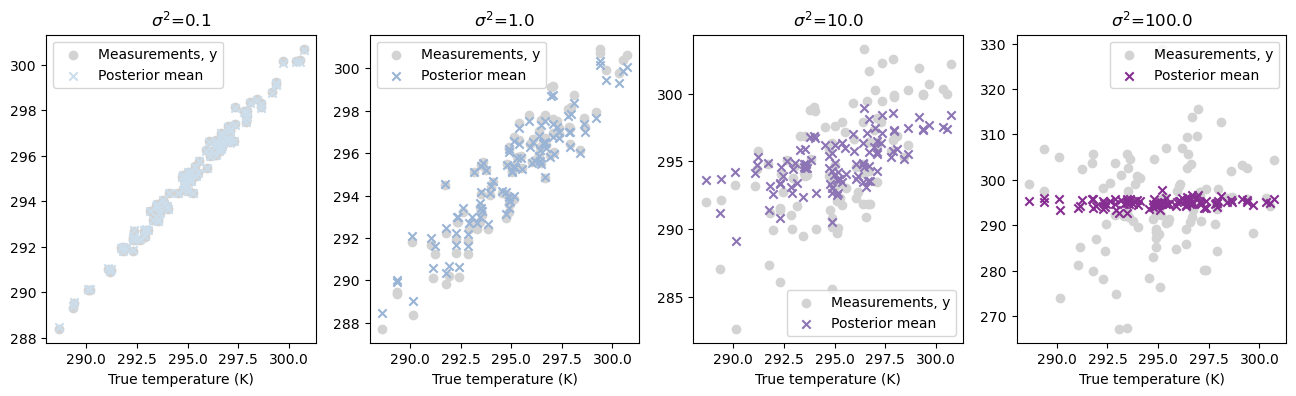

In [50]:
fig, ax = plt.subplots(1,4,figsize=(16,4)) #,sharey=True)

for i, axi, Ni in zip(range(len(N_)), ax, N_):

    # Sample the y for this noise level
    y_all = x + np.sqrt(Ni) * np.random.randn(num_points)

    # Get the posterior parameters
    var_p_all = 1 / ((1 / Ni) + (1 / T))
    mu_p_all = var_p_all * (y_all / Ni + x0 / T)

    color = plt.get_cmap("BuPu")((i+1) / (len(N_)+1))

    axi.scatter(x, y_all, color="lightgrey", marker="o", label="Measurements, y")
    axi.scatter(x, mu_p_all, color=color, marker="x", label=f"Posterior mean")

    axi.set_title(f"$\sigma^2$={Ni}")

    axi.set_xlabel("True temperature (K)")
    # plt.ylabel("Measured temperature (K)")

    axi.legend()

    # Add the entries to the table
    df.loc[Ni, "MSE (measurement)"] = np.mean((y_all - x) ** 2)
    df.loc[Ni, "MSE (posterior mean)"] = np.mean((mu_p_all - x) ** 2)


In [51]:
df.round(2)

,MSE (measurement),MSE (posterior mean)
0.1,0.09,0.09
1.0,1.20,1.03
10.0,9.91,4.16
100.0,99.39,6.62


The relative improvement with the posterior increases as we dial up the noise.... the less we know about the measurement, the more gains we have from our prior knowledge 🌞

### Fun research connection: 

Does knowing about the noise of the data generating process help in ML as well?
-> Yes it does!

Prof. Shira Nemirovsky-Rotman (Haifa) adds the noise level as an extra condition to the NN

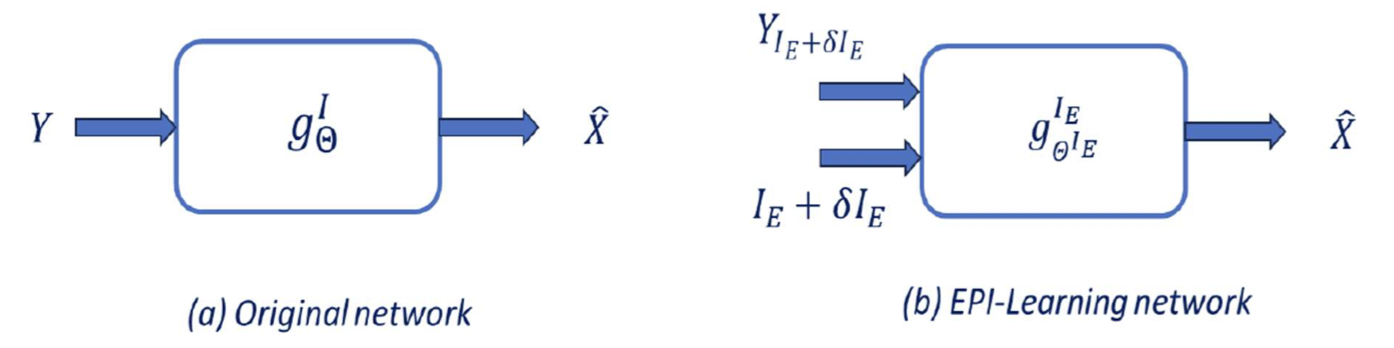

See the talk she gave in Munich last month [here](https://indico.ph.tum.de/event/7932/contributions/10743/attachments/6918/9621/Rotman_slides.pdf)


And for an example in particle physics Prof. Aishik Ghosh (GA Tech) adds a noise of the corrupton to a NN, see [https://arxiv.org/pdf/2105.08742](2105.08742).

These ideas are closely related to **simulation based inference** (which we'll discuss more on Thursday)!

## 2. Statistical combination of the results

In [52]:
mu_atlas  = 172.71
std_atlas = 0.48

mu_cms  = 172.52
std_cms = 0.42


In [53]:
var_comb = 1 / (1 / std_atlas**2 + 1/std_cms**2 )

In [54]:
mu_comb =  var_comb * (mu_atlas / std_atlas**2 + mu_cms / std_cms**2)
mu_comb

172.60238938053098

In [55]:
np.sqrt(var_comb)

np.float64(0.31608221177688867)